In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima 

import math

In [4]:
# initialisation des données

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv("C:/Users/maelm/Documents/L2/PROJET S3/Tesla/TSLA.csv",sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

train_data = stock_data['Close']["2019-10-01":"2021-10-01"]
train_data2 = stock_data['Close']["2013-10-01":"2021-10-01"]


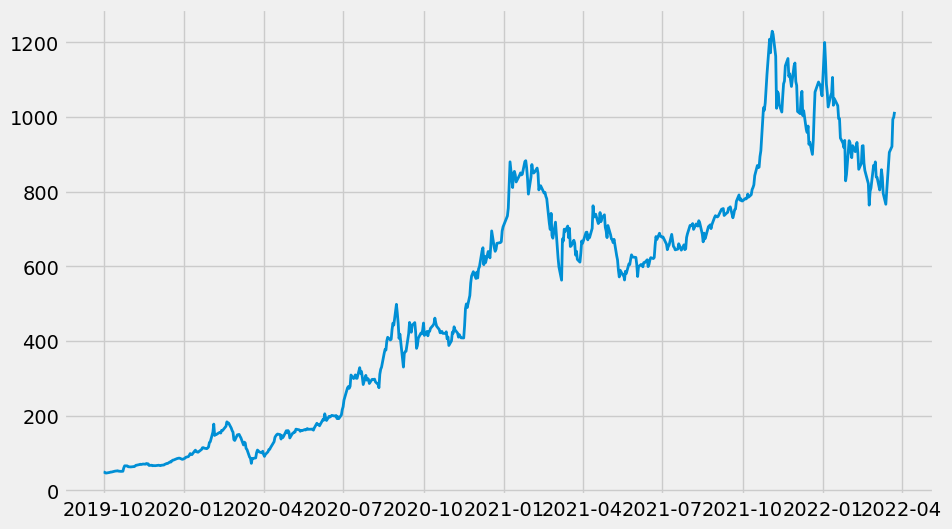

In [7]:
# afficher les données

plt.plot(stock_data["Close"]["2019-10-01":], linewidth=2)

In [3]:
sarima_pred = auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=False, 
                         D=3, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [5]:
sarima_pred2 = auto_arima(train_data2, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=False, 
                         D=3, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

C:\Users\maelm\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maelm\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


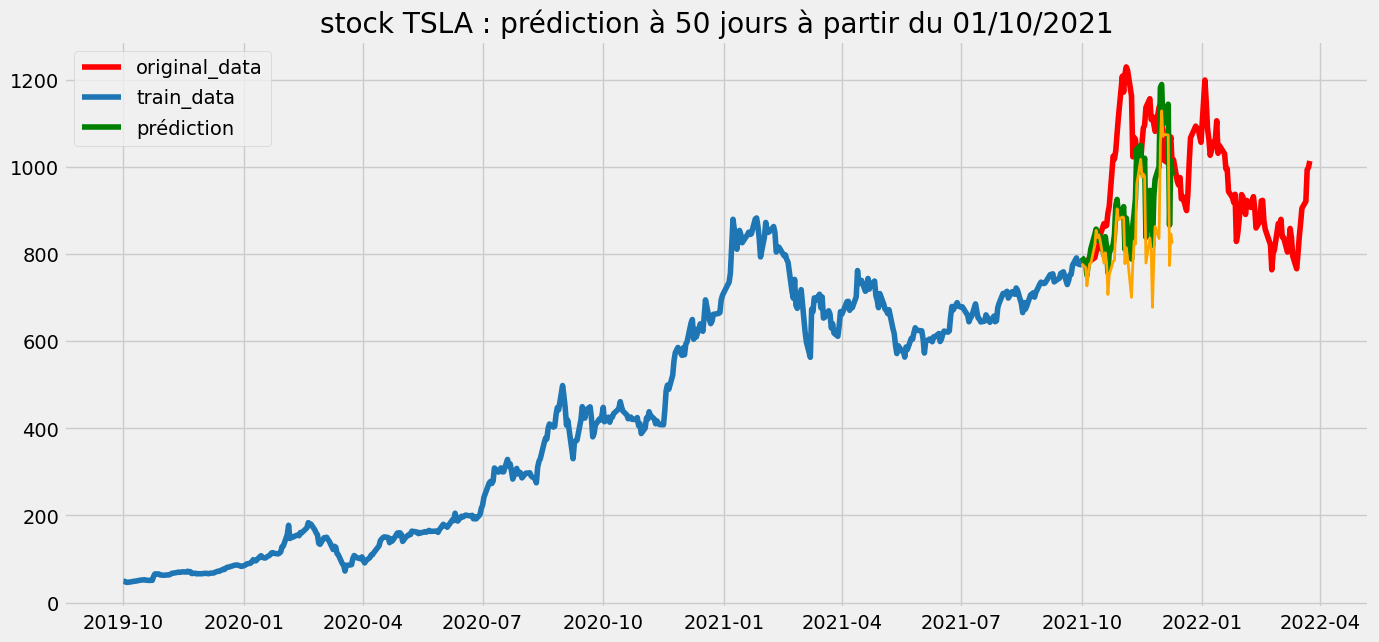

In [10]:
# afficher la prédiction

def forecast(ARIMA_model, ARIMA_model2, periods=50):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(train_data.index[-1] + pd.DateOffset(day=0), periods = n_periods, freq='B')
    # make series for plotting purpose
    fitted_series = pd.Series(fitted.array, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)



    #train_data2
    fitted2, confint2 = ARIMA_model2.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc2 = pd.date_range(train_data2.index[-1] + pd.DateOffset(day=0), periods = n_periods, freq='B')
    
    fitted_series2 = pd.Series(fitted2.array, index=index_of_fc2)


    # Plot
    plt.figure(figsize=(15,7))

    plt.plot(stock_data['Close']["2021-10-01":], color='red', label ="original_data")
    plt.plot(train_data, color='#1f76b4', label="train_data")
    plt.plot(fitted_series, color='green', label="prédiction")

    plt.plot(fitted_series2, color="orange", linewidth=2)


    """plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)"""
    plt.legend()
    plt.title("stock TSLA : prédiction à 50 jours à partir du 01/10/2021")
    plt.show()

forecast(sarima_pred, sarima_pred2)